# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhamad Priasmoro
- **Email:** priasmorosejati@gmail.com
- **ID Dicoding:** priasmoro

## Menentukan Pertanyaan Bisnis

- Apakah terdapat pola korelasi antara jumlah penyewaan sepeda dengan suhu
- Berapa banyak sepeda yang disewakan pada liburan musim panas di tahun 2012
- Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (dteday= 2011-12-25) pada tahun 2011 (yr = 0)?

## Import Semua Packages/Library yang Digunakan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from pandas import ExcelFile

## Data Wrangling

### Gathering Data

In [39]:
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
hour_df = pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Penjelasan :

hour.csv : bike sharing dikumpulkan setiap jam. Catatan: 17379 jam

day.csv : bike sharing sepeda dikumpulkan setiap hari. Catatan: 731 hari

### Assessing Data

# Menilai dataframe day_df

In [41]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


ada kesalahan pada data type column dteday dimana seharusnya buka object tetapi data type datetime

In [42]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terjadi missing values dan duplikasi

In [43]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [44]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#Menilai dataframe hour_df

In [45]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama seperti day_df datatype dari dteday pada hour_df juga salah harusnya datetime bukan object

In [46]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [47]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada missing values dan duplikasi

In [48]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [49]:
print(day_df.nunique())
print("")
print(hour_df.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


### Cleaning Data

memperbaiki tipe data day_df

In [50]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [51]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [52]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memperbaiki tipe data hour_df

In [53]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [54]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [55]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)



### Explore day_df

In [56]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
150,151,2011-05-31,2,0,5,0,2,1,1,0.775000,0.725383,0.636667,0.111329,673,3309,3982
608,609,2012-08-31,3,1,8,0,5,1,1,0.764167,0.689400,0.587500,0.168533,1433,5917,7350
404,405,2012-02-09,1,1,2,0,4,1,1,0.265000,0.261988,0.562083,0.194037,163,3667,3830
344,345,2011-12-11,4,0,12,0,0,0,1,0.220833,0.253154,0.490000,0.066542,377,2366,2743
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747


In [57]:
day_df.describe(include="all")

<ipython-input-57-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


bisa dilihat bahwa hasil kode diatas kita bisa melihat nilai minimal cnt dari day_df data frame untuk menjawab nomor 1 dan 2

In [58]:
# Filter untuk liburan musim panas
filtered_df = day_df[(day_df["yr"] == 1) & (day_df["season"] == 2) & (day_df["holiday"] == 1)]

print(filtered_df)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
471      472 2012-04-16       2   1     4        1        1           0   
513      514 2012-05-28       2   1     5        1        1           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
471           1  0.664167  0.614925  0.561667   0.284829    1198        5172   
513           1  0.712500  0.679300  0.676250   0.196521    2557        3486   

      cnt  
471  6370  
513  6043  


In [59]:
# Melakukan operasi grup setelah filter
result = filtered_df.groupby(by="dteday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

print(result)

           instant   cnt              
           nunique   max   min    mean
dteday                                
2012-04-16       1  6370  6370  6370.0
2012-05-28       1  6043  6043  6043.0


### Explore hour_df

In [60]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
383,384,2012-01-19,1,1,1,0,4,1,1,0.190000,0.190038,0.497500,0.220158,130,3162,3292
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
614,615,2012-09-06,3,1,9,0,4,1,2,0.696667,0.655329,0.810417,0.142421,611,5592,6203
199,200,2011-07-19,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.130600,752,3789,4541
254,255,2011-09-12,3,0,9,0,1,1,1,0.644348,0.602130,0.692174,0.088913,690,4023,4713


In [61]:
day_df.describe(include="all")

<ipython-input-61-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


dari hasil kode diatas adalah untuk menjawab nomor 3

In [62]:
merged_df = pd.merge(day_df, hour_df, on='instant')
print(merged_df)

     instant   dteday_x  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1 2011-01-01         1     0       1          0          6   
1          2 2011-01-02         1     0       1          0          0   
2          3 2011-01-03         1     0       1          0          1   
3          4 2011-01-04         1     0       1          0          2   
4          5 2011-01-05         1     0       1          0          3   
..       ...        ...       ...   ...     ...        ...        ...   
726      727 2012-12-27         1     1      12          0          4   
727      728 2012-12-28         1     1      12          0          5   
728      729 2012-12-29         1     1      12          0          6   
729      730 2012-12-30         1     1      12          0          0   
730      731 2012-12-31         1     1      12          0          1   

     workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0               0             2  0.344167  ...  

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Apakah terdapat pola korelasi antara jumlah penyewaan sepeda dengan suhu**

In [63]:
# Memilih kolom suhu (temp_x) dan jumlah penyewaan sepeda (cnt_y)
selected_df = merged_df[['temp_x', 'cnt_x']]

# Menghitung korelasi antara suhu dan jumlah penyewaan sepeda
correlation = selected_df['temp_x'].corr(selected_df['cnt_x'])

print("Korelasi antara suhu dan jumlah penyewaan sepeda:", correlation)

Korelasi antara suhu dan jumlah penyewaan sepeda: 0.6274940090334918


In [64]:
grouped_df = merged_df.groupby(["dteday_x", "temp_x"])["cnt_x"].sum().reset_index()
print(grouped_df)

      dteday_x    temp_x  cnt_x
0   2011-01-01  0.344167    985
1   2011-01-02  0.363478    801
2   2011-01-03  0.196364   1349
3   2011-01-04  0.200000   1562
4   2011-01-05  0.226957   1600
..         ...       ...    ...
726 2012-12-27  0.254167   2114
727 2012-12-28  0.253333   3095
728 2012-12-29  0.253333   1341
729 2012-12-30  0.255833   1796
730 2012-12-31  0.215833   2729

[731 rows x 3 columns]


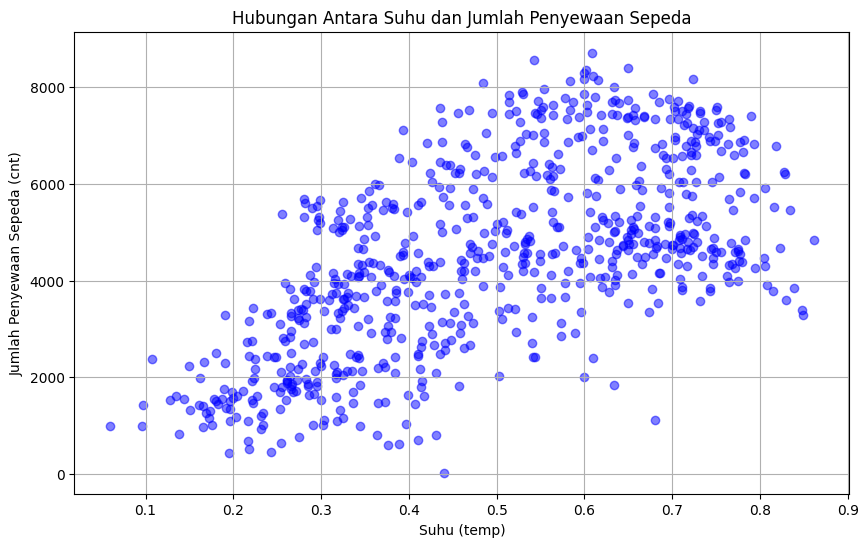

In [65]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['temp_x'], grouped_df['cnt_x'], color='blue', alpha=0.5)

# Memberi label sumbu x dan y
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')

# Memberi judul plot
plt.title('Hubungan Antara Suhu dan Jumlah Penyewaan Sepeda')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

note : Suhu normal dalam Celcius. Nilainya dibagi menjadi 41 (maks)

### Pertanyaan 2:

**Berapa banyak sepeda yang disewakan pada liburan musim panas di tahun 2012?**

In [66]:
# Filter untuk liburan musim panas tahun 2012
filtered_df = day_df[(day_df["yr"] == 1) & (day_df["season"] == 2) & (day_df["holiday"] == 1)]

# Groupby berdasarkan tanggal (dteday) dan menghitung jumlah sewa sepeda (cnt)
filtered_df = filtered_df[['instant', 'dteday', 'cnt']]
filtered_df.groupby(by="dteday").agg({
    "instant": "nunique",
    "cnt": "sum",
}).sort_values(by="cnt", ascending=False)
# Tampilkan output
print(filtered_df)

total = filtered_df["cnt"].sum()

print("Jumlah total sepeda yang disewakan pada liburan musim panas tahun 2012 adalah berjumlah : ", total)

     instant     dteday   cnt
471      472 2012-04-16  6370
513      514 2012-05-28  6043
Jumlah total sepeda yang disewakan pada liburan musim panas tahun 2012 adalah berjumlah :  12413


### Pertanyaan 3:

**Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (dteday = 2011-12-25) pada tahun 2011 (yr = 0)?**

In [67]:
# Filter untuk tanggal dan tahun yang sesuai
filtered_df = hour_df[(hour_df["dteday"] == "2011-12-25") & (hour_df["yr"] == 0)]

# Melakukan agregasi berdasarkan jam sewa sepeda (cnt)
hourly_distribution = filtered_df.groupby("hr")["cnt"].sum()

print("Jumlah per jam Sepeda yang di sewakan pada hari Natal : ")
print(hourly_distribution)

Jumlah per jam Sepeda yang di sewakan pada hari Natal : 
hr
0      6
1      4
2      2
3      4
5      1
6      1
7      4
8      5
9     23
10    43
11    85
12    66
13    79
14    86
15    91
16    86
17    44
18    30
19    16
20    26
21    19
22    17
23    16
Name: cnt, dtype: int64


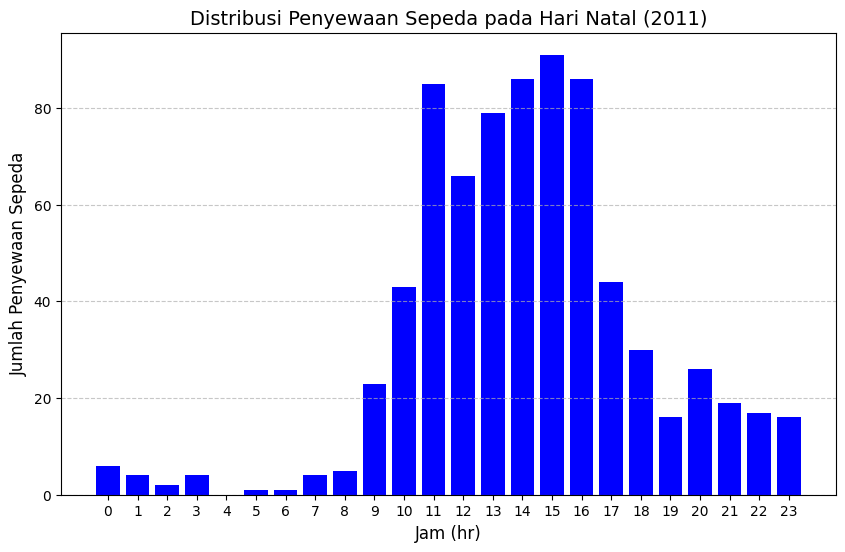

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_distribution.index, hourly_distribution.values, color='blue')
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.title('Distribusi Penyewaan Sepeda pada Hari Natal (2011)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(range(24))

plt.show()

## Conclusion

- Conclusion pertanyaan 1

pada pertanyaan nomor 1 Apakah terdapat pola korelasi antara jumlah penyewaan sepeda dengan suhu?

jawabannya adalah terdapat pola korelasi. jika kita mencoba memeriksa dataframe day_df dengan fungsi `corr()` menghasilkan *0.6274940090334918* (positif dan mendekati satu) yang berarti **cukup bersesuaian**

setelah itu saya memeriksa juga dengan memvisualisasikan datanya dengan scatter plot dan memperoleh kesimpulan **bahwa semakin hangat atau tinggi suhu akan semakin banyak yang menyewa sepeda.**

- Conclusion pertanyaan 2

pada pertanyaan nomor 2 Berapa banyak sepeda yang disewakan pada liburan musim panas di tahun 2012?

Jumlah total sepeda yang disewakan pada liburan musim panas tahun 2012 adalah berjumlah : *12.413*

- Conclusion pertanyaan 3

pada pertanyaan nomor 3 Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (dteday = 2011-12-25) pada tahun 2011 (yr = 0)?

pada data distribusi dan visualization diatas bahwa terjadi peningkatan penyewaan pada jam 13 - 15


#Merge all data

In [69]:
# Melakukan merge antara hour_df dan day_df
main_data = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on="instant")

# Menampilkan main_data
print(main_data)

     instant   dteday_x  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1 2011-01-01         1     0       1          0          6   
1          2 2011-01-02         1     0       1          0          0   
2          3 2011-01-03         1     0       1          0          1   
3          4 2011-01-04         1     0       1          0          2   
4          5 2011-01-05         1     0       1          0          3   
..       ...        ...       ...   ...     ...        ...        ...   
726      727 2012-12-27         1     1      12          0          4   
727      728 2012-12-28         1     1      12          0          5   
728      729 2012-12-29         1     1      12          0          6   
729      730 2012-12-30         1     1      12          0          0   
730      731 2012-12-31         1     1      12          0          1   

     workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0               0             2  0.344167  ...  

In [70]:
main_data.to_csv("main_data.csv", index=False)